In [1]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem import PandasTools
from tqdm import tqdm
import torch

In [2]:
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

In [4]:
exp_original = PandasTools.LoadSDF('../data/dw/00_experimental_training_datasets.sdf')

In [5]:
final_exp = torch.load('../data/dw/exp_processed.pt')

In [6]:
exp_original.shape, final_exp.shape

((5994, 7), (5834, 18))

In [7]:
exp_original.head()

,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,ROMol
0,6.21,6.09,10,basic,['chembl25'],1702768,<rdkit.Chem.rdchem.Mol object at 0x151438270>
1,7.46,8.2,9,basic,['chembl25'],273537,<rdkit.Chem.rdchem.Mol object at 0x151438900>
2,4.2,3.94,9,basic,['datawarrior'],7175,<rdkit.Chem.rdchem.Mol object at 0x151438820>
3,3.73,5.91,8,acidic,['datawarrior'],998,<rdkit.Chem.rdchem.Mol object at 0x1514384a0>
4,11.0,8.94,13,basic,['chembl25'],560562,<rdkit.Chem.rdchem.Mol object at 0x151438660>


In [8]:
final_exp.head()

,exp_id,pka,center,prot_smiles,deprot_smiles,prot_charge,deprot_charge,prot_mol,deprot_mol,acid_base_type,acid_base_string,ROMol,MolWt,HeavyAtomCount,NumHDonors,NumHAcceptors,MolLogP,NumRotatableBonds
0,mol0,6.21,10,Brc1c(N2CCCCCC2)nc(C2CC2)[nH+]c1NC1CC1,Brc1c(NC2CC2)nc(C2CC2)nc1N1CCCCCC1,1,0,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,basic,B,<rdkit.Chem.PropertyMol.PropertyMol object at ...,350.110609,21,1,4,4.0712,4
1,mol1,7.46,9,Brc1cc(Br)c(NC2=[NH+]CCN2)c(Br)c1,Brc1cc(Br)c(NC2=NCCN2)c(Br)c1,1,0,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,basic,B,<rdkit.Chem.PropertyMol.PropertyMol object at ...,394.826834,15,2,3,3.3452,1
2,mol2,4.20,9,Brc1cc2cccnc2c2[nH+]cccc12,Brc1cc2cccnc2c2ncccc12,1,0,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,basic,B,<rdkit.Chem.PropertyMol.PropertyMol object at ...,257.979260,15,0,2,3.5455,0
3,mol3,3.73,8,Brc1ccc(-c2nn[nH]n2)cc1,Brc1ccc(-c2nn[n-]n2)cc1,0,-1,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,acidic,A,<rdkit.Chem.PropertyMol.PropertyMol object at ...,223.969758,12,1,3,1.6292,1
4,mol4,11.00,13,Brc1ccc(Br)c(N(CC2CC2)C2=[NH+]CCN2)c1,Brc1ccc(Br)c(N(CC2CC2)C2=NCCN2)c1,1,0,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,basic,B,<rdkit.Chem.PropertyMol.PropertyMol object at ...,370.963272,18,1,3,3.3872,3


In [9]:
use_id = [int(i.split('mol')[1]) for i in final_exp['exp_id']]

In [8]:
not_use_id = list(set(range(exp_original.shape[0])) - set(use_id))

In [9]:
len(not_use_id)

160

In [93]:
exp_makeup = exp_original.loc[not_use_id, :]

In [94]:
exp_makeup.head()

,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,ROMol
1536,8.2,7.1,6,basic,['datawarrior'],2896,<rdkit.Chem.rdchem.Mol object at 0x14b5a9cd0580>
1026,7.86,5.78,5,basic,['chembl25'],963740,<rdkit.Chem.rdchem.Mol object at 0x14b5a9b164a0>
2067,7.5,5.46,4,basic,['datawarrior'],763,<rdkit.Chem.rdchem.Mol object at 0x14b5a9c75f20>
4630,7.42,6.87,17,basic,['datawarrior'],6682,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ec97b0>
4633,9.65,8.32,13,basic,['datawarrior'],5032,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ec9660>


In [148]:
exp_makeup.shape

(160, 9)

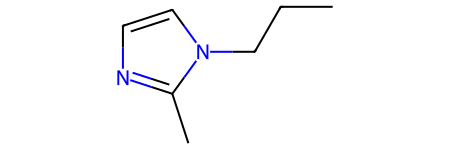

In [95]:
exp_makeup['ROMol'].values[0]

In [11]:
exp_original.loc[not_use_id, :].groupby('marvin_pKa_type').count()

,pKa,marvin_pKa,marvin_atom,original_dataset,ID,ROMol
marvin_pKa_type,,,,,,
acidic,37,37,37,37,37,37
basic,123,123,123,123,123,123


In [12]:
import mols2grid

In [128]:
prot_mols = []
deprot_mols = []
for idx, pka_type, mol, center in zip(exp_makeup.index, exp_makeup['marvin_pKa_type'], exp_makeup['ROMol'], exp_makeup['marvin_atom']):
    mol_changed = Chem.RWMol(mol)
    atom = mol_changed.GetAtomWithIdx(int(center))
    charge = atom.GetFormalCharge()
    Ex_Hs = atom.GetNumExplicitHs()
    Tot_Hs = atom.GetTotalNumHs()
   
    if pka_type == 'basic':
        if charge == 0:
            print('here')
            deprot_mols.append(mol)
            atom.SetFormalCharge(charge + 1)
            atom.SetNumExplicitHs(Ex_Hs + 1)
            prot_mols.append(mol_changed)
            
        elif charge == 1:
            prot_mols.append(mol)
            atom.SetFormalCharge(charge - 1)
            atom.SetNumExplicitHs(Ex_Hs - 1)
            deprot_mols.append(mol_changed)
    
    
    if pka_type == 'acidic':
        if charge == 0:
            prot_mols.append(mol)
            atom.SetFormalCharge(charge - 1)
            atom.SetNumExplicitHs(Ex_Hs - 1)
            deprot_mols.append(mol_changed)
        elif charge == -1:
            deprot_mols.append(mol)
            atom.SetFormalCharge(charge + 1)
            atom.SetNumExplicitHs(Ex_Hs + 1)
            prot_mols.append(mol_changed)
    atom.UpdatePropertyCache()
    #break
            

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


In [129]:
prot_mols

In [130]:
deprot_mols

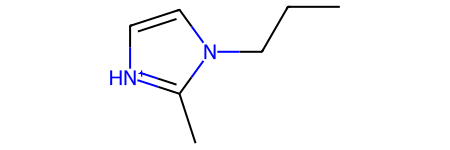

In [131]:
prot_mols[0]

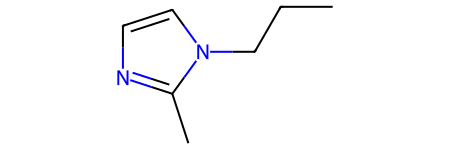

In [132]:
deprot_mols[0]

In [133]:
exp_makeup['prot_mol'] = prot_mols
exp_makeup['deprot_mol'] = deprot_mols


In [135]:
mols2grid.display(exp_makeup, mol_col='prot_mol', size=(200,200))

MolGridWidget()

In [136]:
mols2grid.display(exp_makeup, mol_col='deprot_mol', size=(200,200))

MolGridWidget()

In [137]:
exp_makeup.head()

,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,ROMol,prot_mol,deprot_mol
1536,8.2,7.1,6,basic,['datawarrior'],2896,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>
1026,7.86,5.78,5,basic,['chembl25'],963740,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>
2067,7.5,5.46,4,basic,['datawarrior'],763,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,<rdkit.Chem.rdchem.RWMol object at 0x14b5aa32c...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>
4630,7.42,6.87,17,basic,['datawarrior'],6682,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9ddf...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>
4633,9.65,8.32,13,basic,['datawarrior'],5032,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d8...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>


In [138]:
from rdkit.Chem.MolStandardize import rdMolStandardize
un = rdMolStandardize.Uncharger()

from collections import defaultdict

from molvs import standardize_smiles

In [139]:
acid_base_smarts = pd.read_csv('../data/pka_smarts/smarts_pattern.tsv', delimiter='\t')

In [142]:
mol_acid_base = defaultdict(list)
for idx, center, prot_mol, deprot_mol in zip(exp_makeup.index, exp_makeup['marvin_atom'], exp_makeup['prot_mol'], exp_makeup['deprot_mol']):
    #p = Chem.MolFromSmiles(standardize_smiles(Chem.MolToSmiles(mol_with_atom_index(deprot_mol))))
    #mol = Chem.MolFromSmiles(smi)
    #p = deprot_mol
    prot_mol = un.uncharge(prot_mol)
    #mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol_with_atom_index(mol)))
    mol = Chem.AddHs(prot_mol)
    for smart, a in zip(acid_base_smarts['    SMARTS'], acid_base_smarts['Acid_or_base']):
        if mol.HasSubstructMatch(Chem.MolFromSmarts(smart)):
            matches = sum(mol.GetSubstructMatches(Chem.MolFromSmarts(smart)), ())
            #print(smart, matches)
            center = int(center)
            if center in matches:
                #print('here')
                if deprot_mol.GetAtomWithIdx(center).GetFormalCharge() == -1: 
                    if a == 'A':
                        mol_acid_base[idx].append([smart, a])
                        break
                elif deprot_mol.GetAtomWithIdx(center).GetFormalCharge() == 0:
                    if a == 'B':
                        mol_acid_base[idx].append([smart, a])
                        break
                        

[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Removed positive charge.
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Removed positive charge.
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger
[17:02:14] Running Uncharger


In [143]:
mol_acid_base

defaultdict(list,
            {1536: [['[c:0]:[nX2:1]:[c:2]', 'B']],
             1026: [['[CX3:0]=[NX2:1]-[CX4,SX4:2]', 'B']],
             2067: [['[CX4:0]-[NX3:1]([CX4,c:2])([CX4,c:3])', 'B']],
             4630: [['[c:0]:[nX2:1]:[c:2]', 'B']],
             4633: [['[c:0]:[nX2:1]:[c:2]', 'B']],
             4635: [['[c:0]:[nX2:1]:[c:2]', 'B']],
             1564: [['[CX4:0]-[NX3:1]([CX4,c:2])([CX4,c:3])', 'B']],
             1565: [['[CX4:0]-[NX3:1]([CX4,c:2])([CX4,c:3])', 'B']],
             1566: [['[CX4:0]-[NX3:1]([CX4,c:2])([CX4,c:3])', 'B']],
             4130: [['[c:0]=[NX2:1]', 'B']],
             2596: [['[c:0]:[nX2:1]:[c:2]', 'B']],
             3620: [['[c:0]:[nX2:1]:[c:2]', 'B']],
             560: [['[c:0]:[nX2:1]:[c:2]', 'B']],
             1588: [['[CX4:0]-[NX3:1]([CX4,c:2])([CX4,c:3])', 'B']],
             2101: [['[CX4:0]-[NX3:1]([CX4,c:2])([CX4,c:3])', 'B']],
             2102: [['[CX4:0]-[NX3:1]([CX4,c:2])([CX4,c:3])', 'B']],
             4152: [['[c:0]:[nX2:1]:[c:

In [147]:
len(mol_acid_base)

158

In [145]:
c = 0 
use_i = []
for i in list(mol_acid_base.keys()):
    if exp_makeup.loc[i, 'marvin_pKa_type'] == 'acidic' and mol_acid_base[i][0][1] == 'A':
        c += 1
        use_i.append(i)
    elif exp_makeup.loc[i, 'marvin_pKa_type'] == 'basic' and mol_acid_base[i][0][1] == 'B':
        c += 1
        use_i.append(i)
        

In [146]:
c

158

In [149]:
not_use_i1 = set(exp_makeup.index) - set(list(mol_acid_base.keys()))

In [150]:
not_use_i1

{136, 1436}

In [152]:
res = []
#check2 = []
for i in not_use_i1:
    print(i)
    prot_mol = exp_makeup.loc[i, 'prot_mol']
    deprot_mol = exp_makeup.loc[i, 'deprot_mol']
    #prot_charge = exp_makeup.loc[i, 'prot_charge']
    #deprot_charge = exp_makeup.loc[i, 'deprot_charge']
    center = int(exp_makeup.loc[i, 'marvin_atom'])

    if prot_mol.GetAtomWithIdx(center).GetFormalCharge() == 0 and deprot_mol.GetAtomWithIdx(center).GetFormalCharge() == -1: 
        #if prot_charge != 0 or deprot_charge != -1:
        #    check2.append(i)
        res.append('A')
    
    if prot_mol.GetAtomWithIdx(center).GetFormalCharge() == 1 and deprot_mol.GetAtomWithIdx(center).GetFormalCharge() == 0: 
        #if prot_charge != 1 or deprot_charge != 0:
        #    check2.append(i)
        res.append('B')

136
1436


In [153]:
res

['B', 'B']

In [154]:
exp_makeup['acid_base_string'] = str

In [155]:
exp_makeup.loc[list(mol_acid_base.keys()), 'acid_base_string'] = [i[0][1] for i in list(mol_acid_base.values())]

In [156]:
exp_makeup.loc[list(not_use_i1), 'acid_base_string'] = res

In [157]:
exp_makeup

,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,ROMol,prot_mol,deprot_mol,acid_base_string
1536,8.2,7.1,6,basic,['datawarrior'],2896,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,B
1026,7.86,5.78,5,basic,['chembl25'],963740,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,B
2067,7.5,5.46,4,basic,['datawarrior'],763,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,<rdkit.Chem.rdchem.RWMol object at 0x14b5aa32c...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,B
4630,7.42,6.87,17,basic,['datawarrior'],6682,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9ddf...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,B
4633,9.65,8.32,13,basic,['datawarrior'],5032,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d8...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,B
...,...,...,...,...,...,...,...,...,...,...
975,8.99,8.34,2,basic,['datawarrior'],5999,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2eea0>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9c1f...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2eea0>,B
2042,8.46,4.59,11,acidic,['datawarrior'],823,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2eef0>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9c1f...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2eef0>,A
2555,7.94,6.37,16,basic,['chembl25'],14699144,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2ef40>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9c1f...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2ef40>,B
3580,7.72,6.37,15,basic,['chembl25'],14699142,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2ef90>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9c1f...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2ef90>,B


In [158]:
exp_makeup.groupby('acid_base_string').count()

,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,ROMol,prot_mol,deprot_mol
acid_base_string,,,,,,,,,
A,37,37,37,37,37,37,37,37,37
B,123,123,123,123,123,123,123,123,123


In [160]:
ROMol = []
#acid_base_num = []
for i in exp_makeup.index:
    acid_base = exp_makeup.loc[i, 'acid_base_string']
    #acid_base_string.append(acid_base)
    if acid_base == 'A':
        ROMol.append(exp_makeup.loc[i, 'prot_mol'])
    elif acid_base == 'B':
        ROMol.append(exp_makeup.loc[i, 'deprot_mol'])

In [161]:
exp_makeup['ROMol_rev'] = ROMol

In [162]:
exp_makeup.head()

,pKa,marvin_pKa,marvin_atom,marvin_pKa_type,original_dataset,ID,ROMol,prot_mol,deprot_mol,acid_base_string,ROMol_rev
1536,8.2,7.1,6,basic,['datawarrior'],2896,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>
1026,7.86,5.78,5,basic,['chembl25'],963740,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>
2067,7.5,5.46,4,basic,['datawarrior'],763,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,<rdkit.Chem.rdchem.RWMol object at 0x14b5aa32c...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>
4630,7.42,6.87,17,basic,['datawarrior'],6682,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9ddf...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>
4633,9.65,8.32,13,basic,['datawarrior'],5032,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d8...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>


In [165]:
exp_makeup['exp_id'] = [f'mol{i}' for i in exp_makeup.index]

In [167]:
exp_makeup.columns

Index(['pKa', 'marvin_pKa', 'marvin_atom', 'marvin_pKa_type',
       'original_dataset', 'ID', 'ROMol', 'prot_mol', 'deprot_mol',
       'acid_base_string', 'ROMol_rev', 'exp_id'],
      dtype='object')

In [179]:
final_exp.columns

Index(['exp_id', 'pka', 'center', 'prot_smiles', 'deprot_smiles',
       'prot_charge', 'deprot_charge', 'prot_mol', 'deprot_mol',
       'acid_base_type', 'acid_base_check', 'acid_base_string', 'ROMol',
       'MolWt', 'HeavyAtomCount', 'NumHDonors', 'NumHAcceptors', 'MolLogP',
       'NumRotatableBonds'],
      dtype='object')

In [172]:
exp_makeup['acid_base_check'] = 'consistent'

In [173]:
exp_makeup.loc[list(not_use_i1), 'acid_base_check'] = 'inconsistent'

In [174]:
from rdkit.Chem.Descriptors import ExactMolWt, HeavyAtomCount, NumHAcceptors, NumHDonors, MolLogP, NumRotatableBonds

In [175]:
mw, hac, nhd, nha, logp, nrb = [], [], [], [], [], []
for mol in tqdm(exp_makeup['ROMol']):
    mw.append(ExactMolWt(mol))
    hac.append(HeavyAtomCount(mol))
    nhd.append(NumHDonors(mol))
    nha.append(NumHAcceptors(mol))
    logp.append(MolLogP(mol))
    nrb.append(NumRotatableBonds(mol))

100%|██████████| 160/160 [00:00<00:00, 3107.31it/s]


In [176]:
for i,j in zip(['MolWt', 'HeavyAtomCount', 'NumHDonors', 'NumHAcceptors', 'MolLogP', 'NumRotatableBonds'], [mw, hac, nhd, nha, logp, nrb]):
    exp_makeup[i] = j

In [177]:
exp_makeup_rev = exp_makeup[['exp_id', 'pKa', 'marvin_atom', 'prot_mol', 'deprot_mol', 'marvin_pKa_type', 'acid_base_check', 'acid_base_string', 'ROMol_rev', 'MolWt', 'HeavyAtomCount', 'NumHDonors', 'NumHAcceptors', 'MolLogP',
       'NumRotatableBonds']]

In [178]:
exp_makeup_rev.head()

,exp_id,pKa,marvin_atom,prot_mol,deprot_mol,marvin_pKa_type,acid_base_check,acid_base_string,ROMol_rev,MolWt,HeavyAtomCount,NumHDonors,NumHAcceptors,MolLogP,NumRotatableBonds
1536,mol1536,8.2,6,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,124.100048,9,0,2,1.60152,2
1026,mol1026,7.86,5,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,85.076025,6,1,1,-1.01980,0
2067,mol2067,7.5,4,<rdkit.Chem.rdchem.RWMol object at 0x14b5aa32c...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,163.136100,12,0,1,2.92130,1
4630,mol4630,7.42,17,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9ddf...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,244.100048,19,1,2,4.12340,0
4633,mol4633,9.65,13,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d8...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,209.095297,16,2,3,2.55240,0


In [180]:
exp_makeup_rev.rename(columns={'pKa': 'pka', 'marvin_atom': 'center', 'marvin_pKa_type': 'acid_base_type', 'ROMol_rev': 'ROMol'}, inplace=True)

/state/partition1/job-37371847/ipykernel_302803/2226839296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_makeup_rev.rename(columns={'pKa': 'pka', 'marvin_atom': 'center', 'marvin_pKa_type': 'acid_base_type', 'ROMol_rev': 'ROMol'}, inplace=True)


In [181]:
exp_makeup_rev

,exp_id,pka,center,prot_mol,deprot_mol,acid_base_type,acid_base_check,acid_base_string,ROMol,MolWt,HeavyAtomCount,NumHDonors,NumHAcceptors,MolLogP,NumRotatableBonds
1536,mol1536,8.2,6,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,124.100048,9,0,2,1.60152,2
1026,mol1026,7.86,5,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,85.076025,6,1,1,-1.01980,0
2067,mol2067,7.5,4,<rdkit.Chem.rdchem.RWMol object at 0x14b5aa32c...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,163.136100,12,0,1,2.92130,1
4630,mol4630,7.42,17,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9ddf...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,244.100048,19,1,2,4.12340,0
4633,mol4633,9.65,13,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d8...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,209.095297,16,2,3,2.55240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,mol975,8.99,2,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9c1f...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2eea0>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2eea0>,184.100048,14,1,1,2.53300,0
2042,mol2042,8.46,11,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9c1f...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2eef0>,acidic,consistent,A,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9c1f...,164.071702,12,0,3,0.11610,2
2555,mol2555,7.94,16,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9c1f...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2ef40>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2ef40>,299.131014,23,0,2,4.98740,3
3580,mol3580,7.72,15,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9c1f...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2ef90>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9d2ef90>,283.136100,22,0,1,5.28722,2


In [183]:
from rdkit.Chem.rdmolops import GetFormalCharge

In [184]:
GetFormalCharge(exp_makeup_rev['prot_mol'].values[0])

1

In [185]:
exp_makeup_rev['prot_charge'] = exp_makeup_rev['prot_mol'].apply(lambda x: GetFormalCharge(x))

/state/partition1/job-37371847/ipykernel_302803/258732057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_makeup_rev['prot_charge'] = exp_makeup_rev['prot_mol'].apply(lambda x: GetFormalCharge(x))


In [186]:
exp_makeup_rev['deprot_charge'] = exp_makeup_rev['deprot_mol'].apply(lambda x: GetFormalCharge(x))

/state/partition1/job-37371847/ipykernel_302803/969274891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_makeup_rev['deprot_charge'] = exp_makeup_rev['deprot_mol'].apply(lambda x: GetFormalCharge(x))


In [189]:
sum(exp_makeup_rev['prot_charge'] > exp_makeup_rev['deprot_charge'])

160

In [190]:
exp_makeup_rev['prot_smiles'] = exp_makeup_rev['prot_mol'].apply(lambda x: Chem.MolToSmiles(x))

/state/partition1/job-37371847/ipykernel_302803/3538079292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_makeup_rev['prot_smiles'] = exp_makeup_rev['prot_mol'].apply(lambda x: Chem.MolToSmiles(x))


In [191]:
exp_makeup_rev['deprot_smiles'] = exp_makeup_rev['deprot_mol'].apply(lambda x: Chem.MolToSmiles(x))

In [192]:
exp_makeup_rev['SMILES'] = exp_makeup_rev['ROMol'].apply(lambda x: Chem.MolToSmiles(x))

In [195]:
exp_makeup_rev.head()

,exp_id,pka,center,prot_mol,deprot_mol,acid_base_type,acid_base_check,acid_base_string,ROMol,MolWt,HeavyAtomCount,NumHDonors,NumHAcceptors,MolLogP,NumRotatableBonds,prot_charge,deprot_charge,prot_smiles,deprot_smiles,SMILES
1536,mol1536,8.2,6,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfea0>,124.100048,9,0,2,1.60152,2,1,0,CCCn1cc[nH+]c1C,CCCn1ccnc1C,CCCn1ccnc1C
1026,mol1026,7.86,5,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d7...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff40>,85.076025,6,1,1,-1.01980,0,2,1,CC1[NH+]=CC[NH2+]1,CC1N=CC[NH2+]1,CC1N=CC[NH2+]1
2067,mol2067,7.5,4,<rdkit.Chem.rdchem.RWMol object at 0x14b5aa32c...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddff90>,163.136100,12,0,1,2.92130,1,1,0,C[NH+](c1ccccc1)C(C)(C)C,CN(c1ccccc1)C(C)(C)C,CN(c1ccccc1)C(C)(C)C
4630,mol4630,7.42,17,<rdkit.Chem.rdchem.RWMol object at 0x14b5a9ddf...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddfe00>,244.100048,19,1,2,4.12340,0,1,0,Nc1ccc2cc3c(ccc4ccccc43)[nH+]c2c1,Nc1ccc2cc3c(ccc4ccccc43)nc2c1,Nc1ccc2cc3c(ccc4ccccc43)nc2c1
4633,mol4633,9.65,13,<rdkit.Chem.rdchem.RWMol object at 0x14b5a98d8...,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,basic,consistent,B,<rdkit.Chem.rdchem.Mol object at 0x14b5a9ddf7c0>,209.095297,16,2,3,2.55240,0,1,0,Nc1ccc2cc3ccc(N)cc3[nH+]c2c1,Nc1ccc2cc3ccc(N)cc3nc2c1,Nc1ccc2cc3ccc(N)cc3nc2c1


In [194]:
final_exp.columns

Index(['exp_id', 'pka', 'center', 'prot_smiles', 'deprot_smiles',
       'prot_charge', 'deprot_charge', 'prot_mol', 'deprot_mol',
       'acid_base_type', 'acid_base_check', 'acid_base_string', 'ROMol',
       'MolWt', 'HeavyAtomCount', 'NumHDonors', 'NumHAcceptors', 'MolLogP',
       'NumRotatableBonds'],
      dtype='object')

In [259]:
exp_all = pd.concat([final_exp, exp_makeup_rev[final_exp.columns]])

In [260]:
exp_all.shape

(5994, 19)

In [261]:
c = 0 
smi = []
for mol in exp_all['ROMol']:
    try:
        smi.append(mol.GetProp('mol-smiles'))
    except:
        c += 1
        smi.append(Chem.MolToSmiles(Chem.MolFromInchi(Chem.MolToInchi(mol))))
        
#exp_all['SMILES'] = exp_all['ROMol'].apply(lambda x:Chem.MolToSmiles(Chem.MolFromInchi(Chem.MolToInchi(x))))

[12:29:23] WARNING: Proton(s) added/removed; Omitted undefined stereo

[12:29:23] WARNING: Proton(s) added/removed; Omitted undefined stereo

[12:29:23] WARNING: Proton(s) added/removed

[12:29:23] WARNING: Proton(s) added/removed

[12:29:23] WARNING: Omitted undefined stereo

[12:29:23] WARNING: Omitted undefined stereo

[12:29:23] WARNING: Proton(s) added/removed; Omitted undefined stereo

[12:29:23] WARNING: Omitted undefined stereo

[12:29:23] WARNING: Proton(s) added/removed

[12:29:23] WARNING: Omitted undefined stereo

[12:29:23] WARNING: Proton(s) added/removed; Omitted undefined stereo

[12:29:23] WARNING: Proton(s) added/removed

[12:29:23] WARNING: Omitted undefined stereo

[12:29:23] WARNING: Omitted undefined stereo

[12:29:23] WARNING: Proton(s) added/removed

[12:29:23] WARNING: Proton(s) added/removed

[12:29:23] WARNING: Omitted undefined stereo

[12:29:23] WARNING: Proton(s) added/removed

[12:29:23] WARNING: Omitted undefined stereo

[12:29:23] WARNING: Proton(s) add

In [262]:
len(smi)

5994

In [263]:
c

160

In [264]:
exp_all['SMILES'] = smi

In [265]:
len(set(exp_all['SMILES']))

5994

In [266]:
exp_all.head()

,exp_id,pka,center,prot_smiles,deprot_smiles,prot_charge,deprot_charge,prot_mol,deprot_mol,acid_base_type,acid_base_check,acid_base_string,ROMol,MolWt,HeavyAtomCount,NumHDonors,NumHAcceptors,MolLogP,NumRotatableBonds,SMILES
0,mol0,6.21,10,Brc1c(N2CCCCCC2)nc(C2CC2)[nH+]c1NC1CC1,Brc1c(NC2CC2)nc(C2CC2)nc1N1CCCCCC1,1,0,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,basic,consistent,B,<rdkit.Chem.PropertyMol.PropertyMol object at ...,350.110609,21,1,4,4.0712,4,Brc1c(NC2CC2)nc(C2CC2)nc1N1CCCCCC1
1,mol1,7.46,9,Brc1cc(Br)c(NC2=[NH+]CCN2)c(Br)c1,Brc1cc(Br)c(NC2=NCCN2)c(Br)c1,1,0,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,basic,consistent,B,<rdkit.Chem.PropertyMol.PropertyMol object at ...,394.826834,15,2,3,3.3452,1,Brc1cc(Br)c(NC2=NCCN2)c(Br)c1
2,mol2,4.2,9,Brc1cc2cccnc2c2[nH+]cccc12,Brc1cc2cccnc2c2ncccc12,1,0,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,basic,consistent,B,<rdkit.Chem.PropertyMol.PropertyMol object at ...,257.979260,15,0,2,3.5455,0,Brc1cc2cccnc2c2ncccc12
3,mol3,3.73,8,Brc1ccc(-c2nn[nH]n2)cc1,Brc1ccc(-c2nn[n-]n2)cc1,0,-1,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,acidic,consistent,A,<rdkit.Chem.PropertyMol.PropertyMol object at ...,223.969758,12,1,3,1.6292,1,Brc1ccc(-c2nn[nH]n2)cc1
4,mol4,11.0,13,Brc1ccc(Br)c(N(CC2CC2)C2=[NH+]CCN2)c1,Brc1ccc(Br)c(N(CC2CC2)C2=NCCN2)c1,1,0,<rdkit.Chem.PropertyMol.PropertyMol object at ...,<rdkit.Chem.PropertyMol.PropertyMol object at ...,basic,consistent,B,<rdkit.Chem.PropertyMol.PropertyMol object at ...,370.963272,18,1,3,3.3872,3,Brc1ccc(Br)c(N(CC2CC2)C2=NCCN2)c1


In [267]:
torch.save(exp_all, '../data/dw/exp_processed_all.pt')